# Capstone Regression Project

## Business Understanding

## Data Understanding

## Data Preparation

### Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
kcdf = pd.read_csv('./data/kc_house_data.csv')

### Data Exploration

In [3]:
kcdf.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [4]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
kcdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [6]:
kcdf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


### Data Cleaning

In [7]:
# drop the id column - numerical column with no importance to modeling/ records.
#help(kcdf.drop)

In [8]:
kcdf.drop(labels='id',axis=1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [9]:
kcdf = kcdf.drop(labels='id',axis=1)

In [10]:
kcdf.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
greenbelt         object
nuisance          object
view              object
condition         object
grade             object
heat_source       object
sewer_system      object
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
yr_renovated       int64
address           object
lat              float64
long             float64
dtype: object

In [11]:
rnmdate = {'date':'selldate'}
kcdf.rename(columns=rnmdate,inplace=True)
kcdf.head(5)

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [12]:
kcdf.selldate = kcdf.selldate.apply(lambda x: pd.to_datetime(x, yearfirst=True))

In [13]:
kcdf.dtypes

selldate         datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
greenbelt                object
nuisance                 object
view                     object
condition                object
grade                    object
heat_source              object
sewer_system             object
sqft_above                int64
sqft_basement             int64
sqft_garage               int64
sqft_patio                int64
yr_built                  int64
yr_renovated              int64
address                  object
lat                     float64
long                    float64
dtype: object

In [14]:
kcdf.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [15]:
kcdf['yr_old'] = np.where(kcdf['yr_renovated'] != 0, kcdf.selldate.apply(lambda x: x.year) - kcdf['yr_renovated'],
                          kcdf['selldate'].apply(lambda x: x.year) - kcdf['yr_built'])

In [16]:
kcdf.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,yr_old
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9


In [17]:
kcdf.address[0:5]

0    2102 Southeast 21st Court, Renton, Washington ...
1    11231 Greenwood Avenue North, Seattle, Washing...
2    8504 South 113th Street, Seattle, Washington 9...
3    4079 Letitia Avenue South, Seattle, Washington...
4    2193 Northwest Talus Drive, Issaquah, Washingt...
Name: address, dtype: object

In [18]:
# it looks like every column has the same format and ending...
# when working with strings, keep in mind that if the strings are not of equal length
kcdf.address[1000][-20:-15]

'98019'

In [19]:
kcdf.address[0].split(',')[2][-5:]

'98055'

In [20]:
kcdf['zipcode'] = kcdf.address.apply(lambda x: x[-20:-15])

## Dropping missing values

In [21]:
kcdf.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,yr_old,zipcode
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53,98055
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71,98133
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65,98178
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11,98118
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9,98027


In [22]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       30155 non-null  datetime64[ns]
 1   price          30155 non-null  float64       
 2   bedrooms       30155 non-null  int64         
 3   bathrooms      30155 non-null  float64       
 4   sqft_living    30155 non-null  int64         
 5   sqft_lot       30155 non-null  int64         
 6   floors         30155 non-null  float64       
 7   waterfront     30155 non-null  object        
 8   greenbelt      30155 non-null  object        
 9   nuisance       30155 non-null  object        
 10  view           30155 non-null  object        
 11  condition      30155 non-null  object        
 12  grade          30155 non-null  object        
 13  heat_source    30123 non-null  object        
 14  sewer_system   30141 non-null  object        
 15  sqft_above     3015

In [23]:
kcdf.isna().sum()/kcdf.shape[0]

selldate         0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.001061
sewer_system     0.000464
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
yr_old           0.000000
zipcode          0.000000
dtype: float64

In [24]:
# remove missing values in these columns, make change permanent using `inplace=True`
kcdf.dropna(subset=['heat_source','sewer_system'], axis=0, inplace=True)

In [25]:
# check percentage of missing data in columns

kcdf.isna().sum()/kcdf.shape[0]

selldate         0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
greenbelt        0.0
nuisance         0.0
view             0.0
condition        0.0
grade            0.0
heat_source      0.0
sewer_system     0.0
sqft_above       0.0
sqft_basement    0.0
sqft_garage      0.0
sqft_patio       0.0
yr_built         0.0
yr_renovated     0.0
address          0.0
lat              0.0
long             0.0
yr_old           0.0
zipcode          0.0
dtype: float64

In [26]:
kcdf.shape

(30111, 26)

## Modeling

### Baseline Model

In [27]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       30111 non-null  datetime64[ns]
 1   price          30111 non-null  float64       
 2   bedrooms       30111 non-null  int64         
 3   bathrooms      30111 non-null  float64       
 4   sqft_living    30111 non-null  int64         
 5   sqft_lot       30111 non-null  int64         
 6   floors         30111 non-null  float64       
 7   waterfront     30111 non-null  object        
 8   greenbelt      30111 non-null  object        
 9   nuisance       30111 non-null  object        
 10  view           30111 non-null  object        
 11  condition      30111 non-null  object        
 12  grade          30111 non-null  object        
 13  heat_source    30111 non-null  object        
 14  sewer_system   30111 non-null  object        
 15  sqft_above     3011

In [28]:
# create a filter that has only the numerical columns of the dataset
pred_cols = [x for x in kcdf.columns if x not in ['selldate','price','waterfront','greenbelt','nuisance','view','condition','grade','heat_source','sewer_system','address','zipcode']]
pred_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'yr_old']

In [29]:
# apply the filter we created to our dataset, assign the model features to 'preds' and assign price to 'target'.
preds = kcdf[pred_cols]
target = kcdf.price

In [30]:
# create baseline model predictor df and target
y= target
X= preds

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     1531.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:19:44   Log-Likelihood:            -4.4734e+05
No. Observations:               30111   AIC:                         8.947e+05
Df Residuals:                   30096   BIC:                         8.948e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.264e+06   1.57e+06     -3.345      0.001   -8.35e+06   -2.18e+06
bedrooms      -1.669e+05   5461.573    -30.555      0.000   -1.78e+05   -1.56e+05
bathrooms      1.411e+05   8062.571     17.497      0.000    1.25e+05    1.57e+05
sqft_living     335.7764     18.281     18.367      0.000     299.944     371.609
sqft_lot         -0.0916      0.068     -1.353      0.176      -0.224       0.041
floors        -1526.3791   9902.358     -0.154      0.877   -2.09e+04    1.79e+04
sqft_above      287.9607     18.662     15.430      0.000     251.382     324.540
sqft_basement   162.6750     13.690     11.883      0.000     135.843     189.507
sqft_garage    -145.2075     19.089     -7.607      0.000    -182.622    -107.793
sqft_patio      260.6295     17.941     14.527      0.000     225.464     295.795
yr_built       2501.8038    774.053      3.232      0.001     984.627    4018.981
yr_renovated    221.2089     24.497      9.030      0.000     173.194     269.223
lat            3.162e+04   4281.656      7.384      0.000    2.32e+04       4e+04
long           1.167e+04   1076.336     10.844      0.000    9561.854    1.38e+04
yr_old         5941.4099    778.619      7.631      0.000    4415.284    7467.536
==============================================================================
Omnibus:                    43095.522   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48118495.038
Skew:                           8.069   Prob(JB):                         0.00
Kurtosis:                     198.173   Cond. No.                     2.48e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Note the r2 value which gives the accuracy of the model. its at 0.416. Cleaning the data, feature engineering and including the dummified categorical variables should improve the r2. Try a couple of those things and see how the r2 improves.**

### Improve upon the baseline model.

In [32]:
# Take a look at the value_counts for our categorical variables. Consider how some of the entries might be reformatted. 
# for example, condition can be altered to take on values of above average, average and below average...
kcdf[['waterfront','greenbelt','nuisance','view','condition','grade']].value_counts()

waterfront  greenbelt  nuisance  view     condition  grade        
NO          NO         NO        NONE     Average    8 Good           4863
                                                     7 Average        4448
                                          Good       7 Average        2931
                                          Average    9 Better         2083
                                          Good       8 Good           1447
                                                                      ... 
                       YES       AVERAGE  Poor       7 Average           1
                                                     6 Low Average       1
YES         NO         NO        AVERAGE  Very Good  9 Better            1
NO          NO         YES       AVERAGE  Poor       5 Fair              1
YES         YES        NO        AVERAGE  Good       12 Luxury           1
Length: 470, dtype: int64

In [33]:
#use pd.get_dummies to dummify categorical variables
cat_columns = ['waterfront','greenbelt','nuisance','view','condition','grade','heat_source','sewer_system']
dummy_kcdf = pd.get_dummies(data=kcdf, columns=cat_columns, drop_first=True)

In [34]:
dummy_kcdf.columns

Index(['selldate', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'address', 'lat', 'long', 'yr_old',
       'zipcode', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES',
       'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED'],
      dtype='object')

### Model Iteration

In [35]:
X.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
yr_renovated       int64
lat              float64
long             float64
yr_old             int64
dtype: object

Most of the data are numerical now... Some are still objects or strings... consider how you might handle these or include them at all. 

In [36]:
# running our model with dummified predictors

X=dummy_kcdf.drop(labels =['selldate','price','zipcode','address'], axis=1)
y=dummy_kcdf.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     754.6
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:20:18   Log-Likelihood:            -4.4405e+05
No. Observations:               30111   AIC:                         8.882e+05
Df Residuals:                   30065   BIC:                         8.886e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -2.623e+06   1.42e+06     -1.852      0.064    -5.4e+06    1.52e+05
bedrooms                        -5.647e+04   5166.765    -10.929      0.000   -6.66e+04   -4.63e+04
bathrooms                        9.666e+04   7389.731     13.080      0.000    8.22e+04    1.11e+05
sqft_living                        99.8336     16.921      5.900      0.000      66.667     133.000
sqft_lot                            0.2823      0.065      4.371      0.000       0.156       0.409
floors                          -5.528e+04   9295.295     -5.947      0.000   -7.35e+04   -3.71e+04
sqft_above                        212.8044     17.227     12.353      0.000     179.039     246.570
sqft_basement                     126.6683     12.757      9.929      0.000     101.664     151.673
sqft_garage                      -179.4730     17.727    -10.125      0.000    -214.218    -144.728
sqft_patio                        135.9421     16.639      8.170      0.000     103.330     168.555
yr_built                         1497.4521    696.162      2.151      0.031     132.945    2861.960
yr_renovated                      170.8073     22.095      7.731      0.000     127.501     214.114
lat                                3.3e+04   3845.633      8.580      0.000    2.55e+04    4.05e+04
long                             8601.5715    969.715      8.870      0.000    6700.889    1.05e+04
yr_old                           4369.4434    704.838      6.199      0.000    2987.931    5750.956
waterfront_YES                   7.502e+05   3.29e+04     22.769      0.000    6.86e+05    8.15e+05
greenbelt_YES                   -3649.4669   2.28e+04     -0.160      0.873   -4.83e+04     4.1e+04
nuisance_YES                     5.488e+04   9550.440      5.746      0.000    3.62e+04    7.36e+04
view_EXCELLENT                   6.253e+05   3.35e+04     18.642      0.000     5.6e+05    6.91e+05
view_FAIR                        1.783e+05   4.38e+04      4.068      0.000    9.24e+04    2.64e+05
view_GOOD                       -1005.5181   2.52e+04     -0.040      0.968   -5.05e+04    4.85e+04
view_NONE                       -3.677e+04   1.51e+04     -2.427      0.015   -6.65e+04   -7076.093
condition_Fair                  -8.554e+04   4.19e+04     -2.043      0.041   -1.68e+05   -3466.265
condition_Good                   3.574e+04   9123.261      3.918      0.000    1.79e+04    5.36e+04
condition_Poor                  -1.062e+05   8.22e+04     -1.293      0.196   -2.67e+05    5.48e+04
condition_Very Good              9.607e+04   1.29e+04      7.437      0.000    7.07e+04    1.21e+05
grade_11 Excellent               8.074e+05   3.53e+04     22.865      0.000    7.38e+05    8.77e+05
grade_12 Luxury                  1.822e+06   5.98e+04     30.450      0.000     1.7

**With minimal data cleaning and adding our dummified variables, our r2 has gone up to 53% accuracy. We have yet to address multicollinearity or any feature engineering yet. Those should improve our r2 a fair amount.**

In [ ]:
# lets check for multicollinearity (if predictor variables are highly correlated with other predictor variables)
import seaborn as sns
sns.heatmap(X.corr())

In [ ]:
# one can also do this in table form. Because we did this after dummying the table is too big to read. perhaps do this step before dummying.
X.corr()

## Previously...

In our last guided practice, we reviewed the overall modeling process. We did some light data cleaning, dummified some variables, established a baseline model as well as a couple of models after the baseline. 

Today we will continue our discussion about data cleaning. Exploring our variables with some additional EDA to inspect for outliers... correct them and model once again.

In [37]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       30111 non-null  datetime64[ns]
 1   price          30111 non-null  float64       
 2   bedrooms       30111 non-null  int64         
 3   bathrooms      30111 non-null  float64       
 4   sqft_living    30111 non-null  int64         
 5   sqft_lot       30111 non-null  int64         
 6   floors         30111 non-null  float64       
 7   waterfront     30111 non-null  object        
 8   greenbelt      30111 non-null  object        
 9   nuisance       30111 non-null  object        
 10  view           30111 non-null  object        
 11  condition      30111 non-null  object        
 12  grade          30111 non-null  object        
 13  heat_source    30111 non-null  object        
 14  sewer_system   30111 non-null  object        
 15  sqft_above     3011

In [39]:
# lets take a look at how to handle zipcode: Its appears to be numerical, but in truth, its a qualitative / categorical 
# feature. (A good way to be sure if the data your looking at is in fact numerical is to ask yourself: can two of these numbers
# be added and is their result meaningful?)

kcdf.zipcode.plot(kind='bar')

TypeError: no numeric data to plot

**As you can see we got a type error above because the data, aside from it having to be treated categorically, the data type is still a string. We want to temporarily cast it as integers so that we can visualize it better. 
For modeling purposes (so that we can dummy it later) we will keep it as a string or 'object' type in the dataframe itself but convert it to numerical in-line so that we dont change the data in the df itself.**

In [42]:
kcdf.zipcode

0        98055
1        98133
2        98178
3        98118
4        98027
         ...  
30150    98103
30151    98116
30152    98122
30153    98055
30154    98148
Name: zipcode, Length: 30111, dtype: object

<AxesSubplot:xlabel='zipcode'>

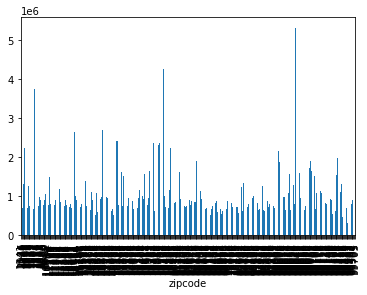

In [43]:
kcdf.groupby(kcdf.zipcode.astype('int')).price.mean().plot(kind='bar')

it looks a bit messy... lets sort it and adjust the figsize.


<AxesSubplot:xlabel='zipcode'>

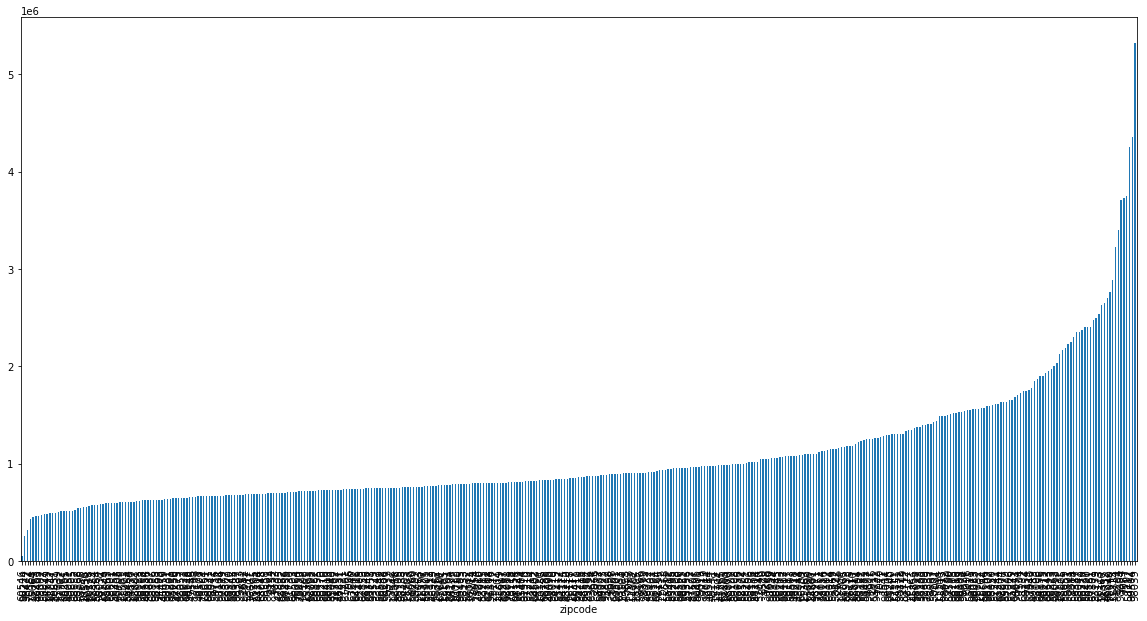

In [45]:
plt.figure(figsize=(20,10))
kcdf.groupby(kcdf.zipcode.astype('int')).price.mean().sort_values(ascending=True).plot(kind='bar')

This still looks bad... theres a possibility that this data includes zipcodes that dont correspond to those in Kings County, WA.

In [47]:
kcdf.zipcode.astype('int').min(), kcdf.zipcode.astype('int').max()

(1541, 99705)

we can see the range of values for zipcode looks strange... we know zipcodes allover the USA are five digits... 
after a quick google search for the zipcodes found in kings county ([reference](https://www.zillow.com/browse/homes/wa/king-county/)) i found that all zipcodes in KC only fall between
98000 and 99000 so i will filter for these. Nice catch for data cleaning! this is why its important to visualize your data, ask questions and make sure things make sense...

In [48]:
# ill create the filter first and then apply it to the zipcode column...
filter_zips = (kcdf.zipcode.astype('int') >= 98000) & (kcdf.zipcode.astype('int')< 99000)  

<AxesSubplot:xlabel='zipcode'>

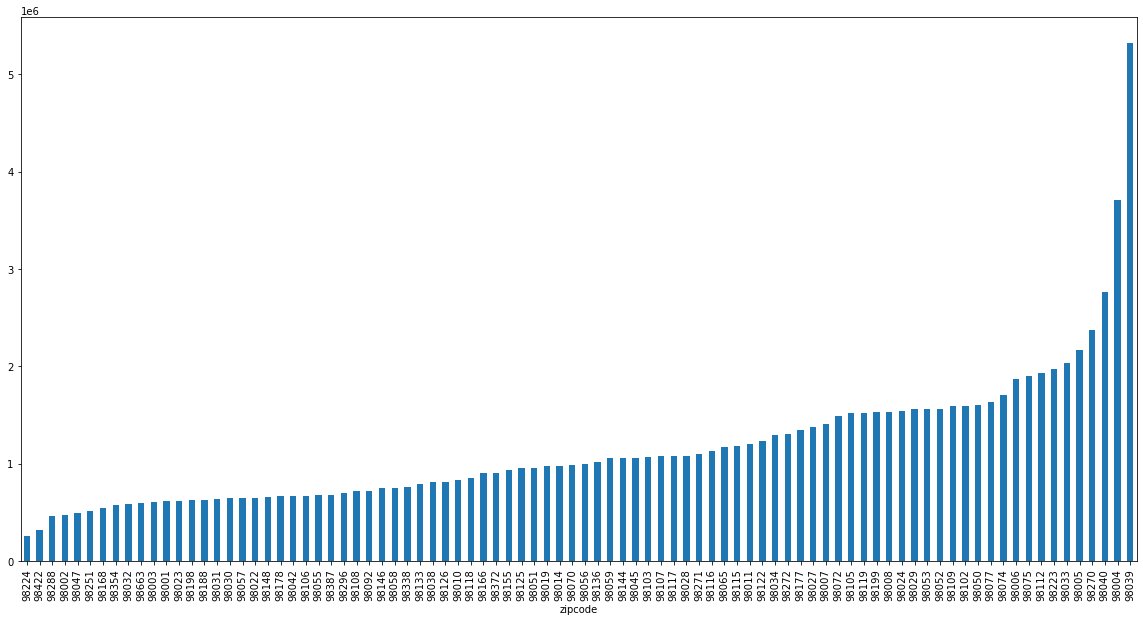

In [49]:
plt.figure(figsize=(20,10))
kcdf.groupby(kcdf.zipcode[filter_zips]).price.mean().sort_values(ascending=True).plot(kind='bar')

#### Looks much better!!! lets filter our entire data set to only include the listing with the appropriate zipcode!

In [50]:
# apply filter to the dataset 
kcdf = kcdf[filter_zips]

In [52]:
# double check that the zipcodes are in the correct range for kings county...
kcdf.zipcode.astype('int').min(),kcdf.zipcode.astype('int').max()

(98001, 98663)

### Work with lat and long data. This is also another data that although it appears numerical it is , in truth, a qualitative variable.

I worked with this data some time ago and thought i could use the lat long to engineer a feature which made sense to me that affected home prices... Distance to the nearest transit location!

I went to google.com and went to their [maps](https://www.google.com/maps/search/transit+in+kings+county,+WA/@47.5826586,-122.3000225,11.75z) page where i searched for "transit it kings county, WA" and i got the locations of the major transit locations (bus and train). 

I noticed if i right clicked on the location pin it gave me coordinates that i could copy and use to calculate distances from the houses to the nearest train/bus option.

![](./images/google_maps_kc.png)

With that information i created a dictionary of the locations names as keys and their lat-long coordinate pairs as tuples and the dictionary values.

In [54]:
### I did this about three or four years ago and i noticed the locations did change a bit so make sure you go through and
### verify yourself and add/update locations... 


transit_loc = {'Northgate TC': (47.707696,-122.326842),
               'UW': (47.651572,-122.304242) ,
               'Westlake': (47.612982,-122.336532) ,
               'Capitol Hill': (47.621353,-122.320111) ,
               'Bellevue': (47.617540,-122.-195230),
               'Pine Street, 9th ave': (47.614489,-122.332074) ,
               'Pioneer Square': (47.603276,-122.331904) ,
               'Kings Street': (47.598833,-122.329926) ,
               "Int'l District/ctown": (47.598308,-122.327837) ,
               '6th ave S & S Atlantic': (47.591008,-122.325878) ,
               'Rainier Ave & Mt Baker TC': (47.578748,-122.297142) ,
               'Rainier Beach': (47.524828,-122.280494),
               'Columbia City': (47.560558,-122.293057) ,
               'Kings County South Base': (47.499379,-122.284285) ,
               'Tukwila': (47.463233,-122.238660) ,
               'Renton TC': (47.488332,-122.210975),
               'Burien TC': (47.474578,-122.334315)}

In [55]:
len(transit_loc) # 17 locations when i did it... i believe now in 2022 there are 15.

17

In [56]:
# remember that to access the values of your dictionary you use .values()
transit_loc.values()

dict_values([(47.707696, -122.326842), (47.651572, -122.304242), (47.612982, -122.336532), (47.621353, -122.320111), (47.61754, -195352.0), (47.614489, -122.332074), (47.603276, -122.331904), (47.598833, -122.329926), (47.598308, -122.327837), (47.591008, -122.325878), (47.578748, -122.297142), (47.524828, -122.280494), (47.560558, -122.293057), (47.499379, -122.284285), (47.463233, -122.23866), (47.488332, -122.210975), (47.474578, -122.334315)])

In [57]:
kcdf.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,yr_old,zipcode
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53,98055
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71,98133
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65,98178
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11,98118
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9,98027


In [58]:
# first thing i want to do is make an array of the lat-long pairs so i can use the location of each house to calculate 
# the distance to the closest train/bus option

loc_coord = np.array(list(zip(kcdf.lat,kcdf.long)))

In [ ]:
# iwill be using geopy a library with functions that calculate geographical distances using lat-long coordinates...
# thanks google!

!pip install geopy

i checked out how to do this by googling: how to calculate distances in python using latitude and longitude

check out a [reference](https://www.section.io/engineering-education/using-geopy-to-calculate-the-distance-between-two-points/) page here.

I decided to use the great circle function which will calculate the distance between two lat-long coordinates

In [59]:
# for this i use a double for loop: for every house location in loc_coord... calculate the distance to all coordinates
# in the coordinate list of transit locations and then choose the minimum one... this will find the closest bus/train
# option to every house location. I made sure to calculate the distance in miles.

import geopy.distance

metro_prox = []

for houseloc in loc_coord:
    sortlist=[]
    for transitloc in transit_loc.values():
        sortlist.append(geopy.distance.great_circle(houseloc, transitloc).miles)
    metro_prox.append(min(sortlist))

In [60]:
metro_prox

[2.0564347640961063,
 1.3770859882750033,
 1.1570221054749916,
 0.4060744418940137,
 7.172166794418706,
 3.902957538494612,
 2.026169935391861,
 6.501494468992343,
 12.599517600635371,
 16.74100706509185,
 0.660939571342477,
 4.574664343350381,
 14.35175649537106,
 12.668022884115215,
 1.26568560775133,
 5.080024422209473,
 4.483170467054378,
 2.188874722839611,
 1.8088675158224599,
 7.416297801313254,
 11.811666378235694,
 0.9291399422034275,
 11.907620626567354,
 4.316871052609478,
 4.6919189419661675,
 13.767715712496228,
 4.258956262534908,
 2.6726139742944794,
 9.133710374111747,
 3.803095264017027,
 1.7791620421270964,
 2.50939455969405,
 1.419115856185723,
 3.0143224307351204,
 4.804833637865626,
 4.2846442058125325,
 20.711488426302683,
 8.218043427859024,
 11.719937985786746,
 1.1769364237998812,
 8.993824679626806,
 4.824647016953919,
 6.66087902022933,
 8.889898441244778,
 10.495783938740004,
 1.7563815843115558,
 3.866881403115425,
 5.870664103910368,
 17.178947248691184,
 

In [61]:
min(metro_prox), max(metro_prox)

(0.002809706443360737, 127.81754050778972)

the minimum distance is .002 miles which is approximately only a couple of city blocks... the largest distance is 127 miles... Kings County is big!

In [62]:
# here i take my distances and make it a column in my data frame!  
kcdf['metro_prox_mi'] = metro_prox

In [63]:
kcdf.head()b

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,yr_old,zipcode,metro_prox_mi
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53,98055,2.056435
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71,98133,1.377086
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65,98178,1.157022
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11,98118,0.406074
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9,98027,7.172167


**Try it out and see if this helps your model!**

### Final Model

## Regression Results

## Level Up: Project Enhancements

After completing the minimum project requirements, you could consider the following enhancements if you have time:

* Consider applying a linear or non-linear transformation to your features and/or target
* Investigate the linear regression assumptions for your final model
* Identify and remove outliers, then redo the analysis
* Compile the data cleaning code into a function

## Conclusion